In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

import xgboost as xgb
import shap



In [5]:
from utils import helper
from ml.preprocess import data
from ml.models.base.brisk_model_lightning import BriskModel
from ml.models.base import brisk_neural_net, brisk_xgboost


In [6]:

X, y = data.get_dataset(f_name = '20220319_covid_merge_processed.csv' , sep = ',')
X_tilda = X.drop(brisk_xgboost.DROP_LIST, axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X_tilda, y, test_size=0.25, random_state=123)

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.25, random_state=123)


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [7]:
model_xgb = xgb.Booster()
model_xgb.load_model('/mnt/c/Users/rwmas/GitHub/xai/xai_api/app/ml/models/saved/base/xgboost/xgboost.json')


In [8]:
explainer = shap.Explainer(model_xgb)
shap_values = explainer(X_train)

[15:23:25] WARNING: /mnt/c/Users/rwmas/xgboost/src/c_api/c_api.cc:967: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[15:23:25] WARNING: /mnt/c/Users/rwmas/xgboost/src/c_api/c_api.cc:967: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [9]:
shap_values.values.shape

(143, 40)

In [10]:
df_shapley = pd.DataFrame(shap_values.values, columns=X_train.columns)

In [11]:
# df_shapley

In [12]:
shapley_score = df_shapley.abs().mean().sort_values(ascending=False)

In [13]:
shapley_score

new_cases_per_million                         1.209482
Cardiovascular diseases                       0.100144
Malaria                                       0.079211
population_cov                                0.077485
Meningitis                                    0.076469
Chronic kidney disease                        0.070381
Cirrhosis and other chronic liver diseases    0.057551
Chronic respiratory diseases                  0.045428
Road injuries                                 0.042589
Diabetes mellitus                             0.042479
Alzheimer's disease and other dementias       0.040388
air_polution                                  0.037918
Self-harm                                     0.028564
Density_km2                                   0.027089
HIV/AIDS                                      0.026701
Diarrheal diseases                            0.025401
Area_km2                                      0.021853
Population                                    0.021643
Neoplasms 

In [14]:
from sklearn import preprocessing
normalized_arr = preprocessing.normalize([shapley_score])
print(normalized_arr)

[[0.98232268 0.08133549 0.06433365 0.06293199 0.06210661 0.05716216
  0.04674199 0.03689557 0.0345903  0.03450054 0.03280231 0.03079621
  0.02319925 0.02200159 0.02168641 0.02063022 0.01774893 0.01757779
  0.01742499 0.01692524 0.01649296 0.01599702 0.01581738 0.01430504
  0.01406006 0.01387588 0.01339798 0.01331971 0.01099724 0.00887617
  0.00803137 0.00758419 0.00589685 0.00348607 0.00326381 0.00140253
  0.00139561 0.         0.         0.        ]]


In [22]:
explainer.expected_value

6.7273126

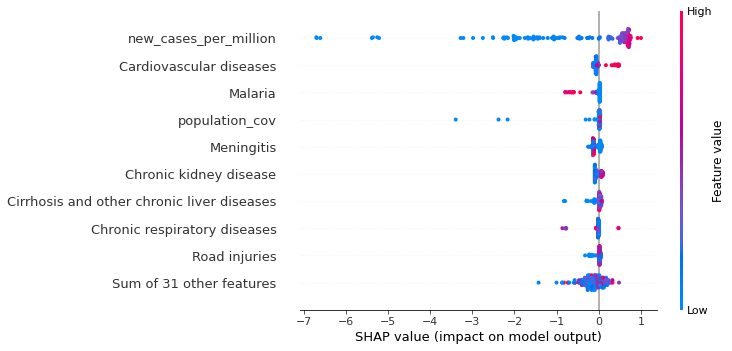

In [23]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

In [48]:
np.sort(np.mean(np.absolute(shap_values.values), axis = 0), )

array([0.        , 0.        , 0.        , 0.00171834, 0.00172686,
       0.00401855, 0.00429221, 0.00726048, 0.00933801, 0.0098886 ,
       0.01092876, 0.01354032, 0.01639986, 0.01649623, 0.01708463,
       0.0173114 , 0.01761304, 0.0194751 , 0.01969628, 0.02030691,
       0.02083915, 0.02145446, 0.0216426 , 0.02185332, 0.0254009 ,
       0.02670133, 0.02708939, 0.028564  , 0.03791774, 0.04038774,
       0.04247868, 0.0425892 , 0.04542756, 0.05755094, 0.07038073,
       0.07646858, 0.07748482, 0.07921062, 0.10014408, 1.2094818 ],
      dtype=float32)

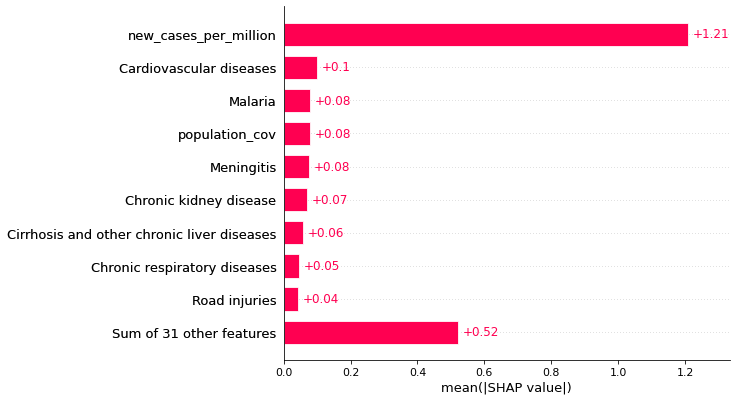

AttributeError: 'NoneType' object has no attribute 'xaxis'

In [32]:
# plt.figure(figsize=(12, 8))
# fig = plt.figure(figsize=(12, 8))

ax = shap.plots.bar(shap_values)

ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('silver')

DeepExplainer

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)